In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
# sys.path.insert(0,'../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:
R = Runner(classifier='kunet',
           activation='relu',
           use_batch_norm=True,
           upsample_mode='deconv',
           dropout=0.3,
           dropout_change_per_layer=0.0,
           dropout_type='spatial',
           use_dropout_on_upsampling=False,
           use_attention=False,
           filters=16,
           num_layers=4,
           output_activation='sigmoid',
           optimizer=None,
           loss=None,
           metric=None,
           verbose=False
          )

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------
*** GP2 KUnet ***
Working directory: /tmp/tmpp17t8y7wGP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
# images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images_final.npy')
# masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks_final.npy')
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

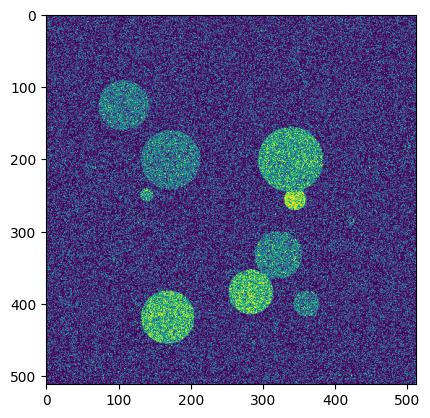

In [5]:
imshow(images[0])

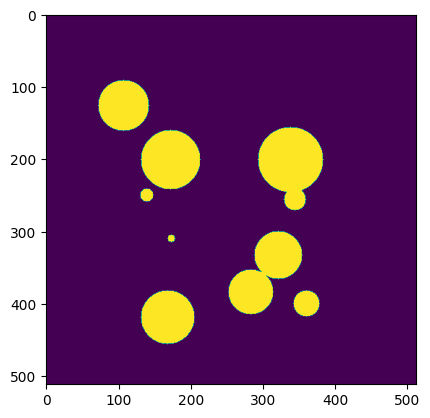

In [6]:
imshow(masks[0])

In [7]:
images = images[:6000]

In [8]:
masks = masks[:6000]

In [9]:
images.shape

(6000, 512, 512, 1)

In [10]:
masks.shape

(6000, 512, 512, 1)

In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [ ]:
R.run(images=images, masks=masks, weights=weights, runs=7)

Weights OK!
******
Loop 1
Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 0.8703 - dice_coeff: 0.1584  

5/5 [==============================] - 1172s 255s/step - loss: 0.8703 - dice_coeff: 0.1584 - val_loss: 1.7658 - val_dice_coeff: 0.2102
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 0.8419 - dice_coeff: 0.1704  

In [ ]:
R.classifier_scores

In [ ]:
R.discriminator_scores

In [ ]:
R.plot()

In [13]:
R.classifier_scores

[[0.20527929067611694, 0.5332748889923096],
 [0.15657241642475128, 0.5977841019630432],
 [0.08493781089782715, 0.7557172775268555],
 [0.17571112513542175, 0.6851200461387634],
 [0.07029161602258682, 0.7886146903038025]]

In [14]:
R.discriminator_scores

[[1.9600526094436646, 0.8138889074325562],
 [1.0182749032974243, 0.8861111402511597],
 [1.410610556602478, 0.8666666746139526],
 [0.5958709120750427, 0.9083333611488342],
 [1.6111506223678589, 0.8333333134651184]]

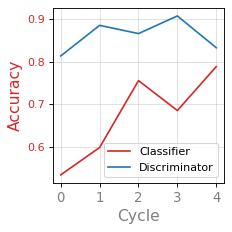

In [15]:
R.plot()

In [ ]:
R.classifier_scores

In [ ]:
R.discriminator_scores

In [ ]:
R.plot()